## Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind

## Dataset

In [3]:
player_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\player_df.csv') 
player_data

,ID,player_name,height_cm,weight_kg,age,experience_years
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7
1,1Jal,Jalen Williams,198,99,23,3
2,2Lug,Luguentz Dort,193,99,25,6
3,3Isa,Isaiah Hartenstein,213,115,26,7
4,4Cas,Cason Wallace,193,92,21,2
...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9
346,346Col,Collin Sexton,190,86,21,7
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7
348,348T.J,T.J. Warren,203,99,26,9


In [4]:
position_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\position_df_r.csv') 
position_data

,ID,positions,ID_positions
0,0Sha,Point Guard,2
1,0Sha,Shooting Guard,4
2,1Jal,Shooting Guard,4
3,1Jal,Power Forward,3
4,2Lug,Small Forward,5
...,...,...,...
638,347Sha,Shooting Guard,4
639,348T.J,Small Forward,5
640,348T.J,Power Forward,3
641,349Spe,Point Guard,2


In [5]:
season_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\seasons_df.csv') 
season_data

,ID,rank,season,groupName,ID_seasons
0,0Sha,NaN,2025,LC,25
1,1Jal,NaN,2025,LC,25
2,2Lug,NaN,2025,LC,25
3,3Isa,NaN,2025,LC,25
4,4Cas,NaN,2025,LC,25
...,...,...,...,...,...
345,345Pas,21.0,2020,TS,20
346,346Col,22.0,2020,TS,20
347,347Sha,23.0,2020,TS,20
348,348T.J,24.0,2020,TS,20


In [6]:
group_data = pd.read_csv('G:\\Data Analysis\\mini project 3\\web scraping\\group_df.csv') 
group_data

,ID_group,groupName
0,1,MJT
1,2,LC
2,3,TS


## New Table

In [7]:
merged_player_season = pd.merge(player_data, season_data, on='ID')
merged_player_season_group = pd.merge(merged_player_season, group_data, on='groupName')
merged_player_season_group

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3


# Descriptive statistics

## Height Distribution of Michael Jordan Trophy and Top 50 Players

In [8]:
mjt_players = merged_player_season_group[merged_player_season_group['groupName'] == 'MJT']
mjt_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
115,115Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,MJT,25,1
116,116Nik,Nikola Jokić,211,128,29,10,2.0,2025,MJT,25,1
117,117Gia,Giannis Antetokounmpo,211,109,30,12,3.0,2025,MJT,25,1
118,118Jay,Jayson Tatum,203,95,26,8,4.0,2025,MJT,25,1
119,119Don,Donovan Mitchell,190,97,28,8,5.0,2025,MJT,25,1
...,...,...,...,...,...,...,...,...,...,...,...
195,195Kev,Kevin Durant,211,108,30,17,8.0,2019,MJT,19,1
196,196Kaw,Kawhi Leonard,201,102,27,13,9.0,2019,MJT,19,1
197,197Rus,Russell Westbrook,193,90,30,17,10.0,2019,MJT,19,1
198,198Rud,Rudy Gobert,216,117,26,12,11.0,2019,MJT,19,1


In [14]:
ts_players = merged_player_season_group[merged_player_season_group['groupName'] == 'TS']
ts_players_five_season = ts_players[(ts_players['season'] >= 2019) & (ts_players['season'] <= 2024)]
ts_players_top_50 = ts_players_five_season[ts_players_five_season['rank'] <= 10]
ts_players_top_50

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3
230,230Ant,Anthony Edwards,193,102,22,5,6.0,2024,TS,24,3
231,231Kev,Kevin Durant,211,108,35,17,7.0,2024,TS,24,3
232,232Jay,Jayson Tatum,203,95,25,8,8.0,2024,TS,24,3
233,233De',De'Aaron Fox,190,83,26,8,9.0,2024,TS,24,3
234,234Ste,Stephen Curry,188,83,35,16,10.0,2024,TS,24,3


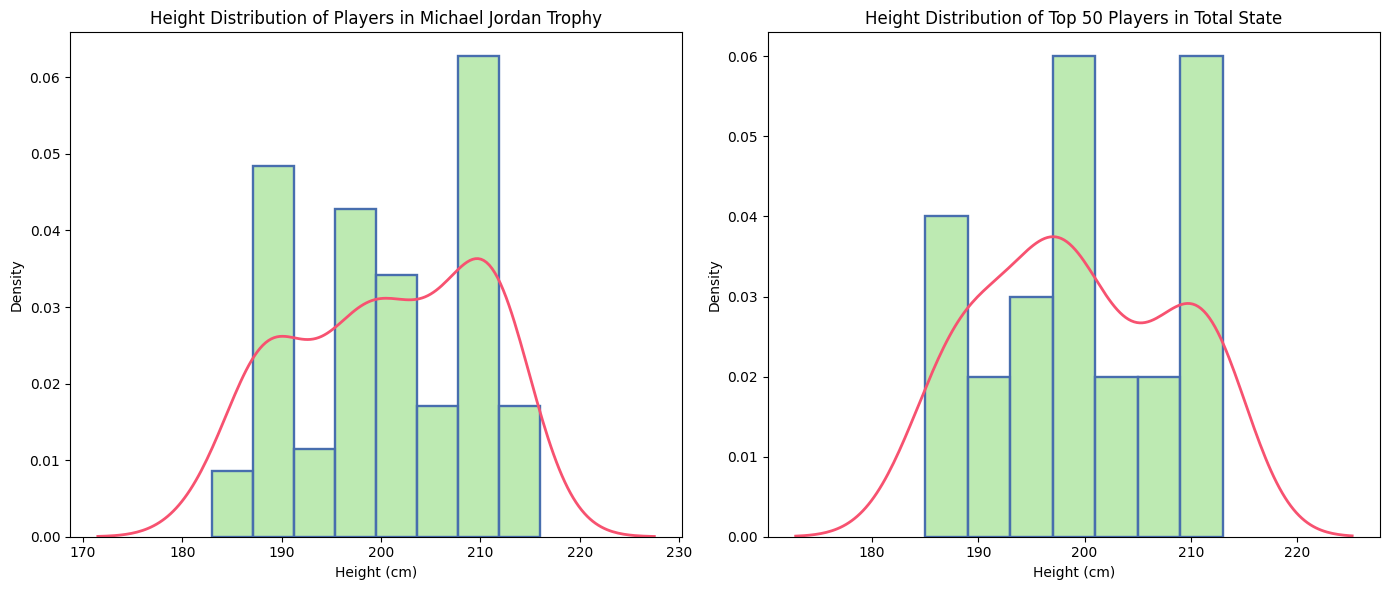

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    mjt_players['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0]
)
sns.kdeplot(
    mjt_players['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[0]
)
axes[0].set_title('Height Distribution of Players in Michael Jordan Trophy')
axes[0].set_xlabel('Height (cm)')
axes[0].set_ylabel('Density')

sns.histplot(
    ts_players_top_50['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1]
)
sns.kdeplot(
    ts_players_top_50['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[1]
)
axes[1].set_title('Height Distribution of Top 50 Players in Total State')
axes[1].set_xlabel('Height (cm)')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [140]:
height_mjt = mjt_players['height_cm'].describe()
height_mjt

count     85.000000
mean     200.741176
std        9.323745
min      183.000000
25%      193.000000
50%      201.000000
75%      211.000000
max      216.000000
Name: height_cm, dtype: float64

In [141]:
height_ts = ts_players_top_50['height_cm'].describe()
height_ts

count     50.000000
mean     199.420000
std        8.873464
min      185.000000
25%      193.000000
50%      198.000000
75%      207.500000
max      213.000000
Name: height_cm, dtype: float64

## Experience and Height Distribution of Champion Team and Top 15 Players

### 2024-2025

In [21]:
lc_players = merged_player_season_group[merged_player_season_group['groupName'] == 'LC']
lc_players_2024_2025 = lc_players[lc_players['season'] >= 2024]
lc_players_2024_2025

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
5,5Che,Chet Holmgren,216,96,22,2,NaN,2025,LC,25,2
6,6Aar,Aaron Wiggins,198,90,26,4,NaN,2025,LC,25,2
7,7Isa,Isaiah Joe,196,82,25,5,NaN,2025,LC,25,2
8,8Ale,Alex Caruso,196,84,30,8,NaN,2025,LC,25,2
9,9Jay,Jaylin Williams,203,113,22,3,NaN,2025,LC,25,2


In [ ]:
ts_players_top_15 = ts_players[ts_players['rank'] <= 15]
ts_players_top_15_2024_2025 = ts_players_top_15[ts_players_top_15['season'] >= 2024]
ts_players_top_15_2024_2025

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
205,205Dev,Devin Booker,198,93,28,10,6.0,2025,TS,25,3
206,206Tra,Trae Young,185,74,26,7,7.0,2025,TS,25,3
207,207Tyl,Tyler Herro,196,88,25,6,8.0,2025,TS,25,3
208,208Cad,Cade Cunningham,198,99,23,4,9.0,2025,TS,25,3
209,209Jam,James Harden,196,99,35,16,10.0,2025,TS,25,3


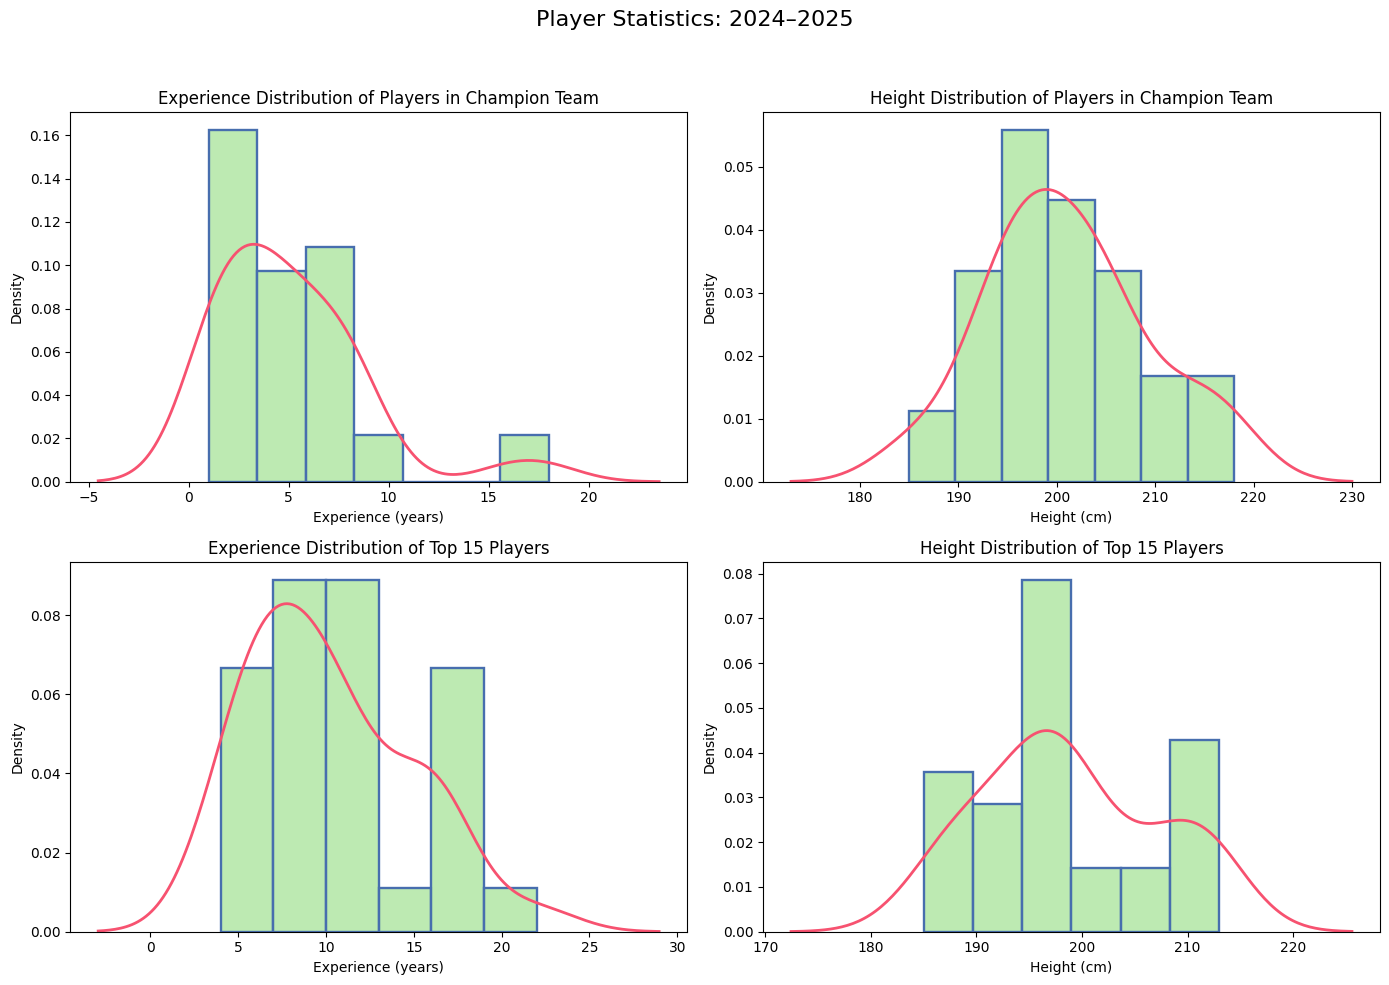

In [61]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Experience - Champion Team
sns.histplot(
    lc_players_2024_2025['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,0]
)
sns.kdeplot(
    lc_players_2024_2025['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[0,0]
)
axes[0,0].set_title('Experience Distribution of Players in Champion Team')
axes[0,0].set_xlabel('Experience (years)')
axes[0,0].set_ylabel('Density')

# Height - Champion Team
sns.histplot(
    lc_players_2024_2025['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,1]
)
sns.kdeplot(
    lc_players_2024_2025['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[0,1]
)
axes[0,1].set_title('Height Distribution of Players in Champion Team')
axes[0,1].set_xlabel('Height (cm)')
axes[0,1].set_ylabel('Density')

# Experience - Top 15 Players
sns.histplot(
    ts_players_top_15_2024_2025['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,0]
)
sns.kdeplot(
    ts_players_top_15_2024_2025['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[1,0]
)
axes[1,0].set_title('Experience Distribution of Top 15 Players')
axes[1,0].set_xlabel('Experience (years)')
axes[1,0].set_ylabel('Density')

# Height - Top 15 Players
sns.histplot(
    ts_players_top_15_2024_2025['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,1]
)
sns.kdeplot(
    ts_players_top_15_2024_2025['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[1,1]
)
axes[1,1].set_title('Height Distribution of Top 15 Players')
axes[1,1].set_xlabel('Height (cm)')
axes[1,1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024–2025', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [126]:
eh_lc_players_24_25 = lc_players_2024_2025[['experience_years', 'height_cm']].describe()
eh_lc_players_24_25

,experience_years,height_cm
count,38.000000,38.000000
mean,5.052632,201.105263
std,3.812833,8.271702
min,1.000000,185.000000
25%,2.000000,196.000000
50%,4.000000,201.000000
75%,7.000000,206.000000
max,18.000000,218.000000


In [127]:
eh_ts_players_24_25 = ts_players_top_15_2024_2025[['experience_years', 'height_cm']].describe()
eh_ts_players_24_25

,experience_years,height_cm
count,30.000000,30.000000
mean,10.166667,198.866667
std,4.586963,8.265981
min,4.000000,185.000000
25%,7.000000,193.000000
50%,10.000000,198.000000
75%,12.750000,205.250000
max,22.000000,213.000000


### 2024

In [47]:
lc_players_2024 = lc_players[lc_players['season'] == 2024]
lc_players_2024

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
19,19Jay,Jayson Tatum,203,95,25,8,NaN,2024,LC,24,2
20,20Jay,Jaylen Brown,198,101,27,9,NaN,2024,LC,24,2
21,21Jru,Jrue Holiday,193,92,33,16,NaN,2024,LC,24,2
22,22Der,Derrick White,193,86,29,8,NaN,2024,LC,24,2
23,23Kri,Kristaps Porziņģis,218,108,28,9,NaN,2024,LC,24,2
24,24Al,Al Horford,206,108,37,18,NaN,2024,LC,24,2
25,25Pay,Payton Pritchard,185,88,26,5,NaN,2024,LC,24,2
26,26Sam,Sam Hauser,203,97,26,4,NaN,2024,LC,24,2
27,27Luk,Luke Kornet,218,113,28,8,NaN,2024,LC,24,2
28,28Xav,Xavier Tillman Sr.,203,111,25,5,NaN,2024,LC,24,2


In [48]:
ts_players_top_15_2024 = ts_players_top_15[ts_players_top_15['season'] == 2024]
ts_players_top_15_2024

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
225,225Luk,Luka Dončić,198,104,24,7,1.0,2024,TS,24,3
226,226Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,TS,24,3
227,227Gia,Giannis Antetokounmpo,211,109,29,12,3.0,2024,TS,24,3
228,228Jal,Jalen Brunson,188,86,27,7,4.0,2024,TS,24,3
229,229Nik,Nikola Jokić,211,128,28,10,5.0,2024,TS,24,3
230,230Ant,Anthony Edwards,193,102,22,5,6.0,2024,TS,24,3
231,231Kev,Kevin Durant,211,108,35,17,7.0,2024,TS,24,3
232,232Jay,Jayson Tatum,203,95,25,8,8.0,2024,TS,24,3
233,233De',De'Aaron Fox,190,83,26,8,9.0,2024,TS,24,3
234,234Ste,Stephen Curry,188,83,35,16,10.0,2024,TS,24,3


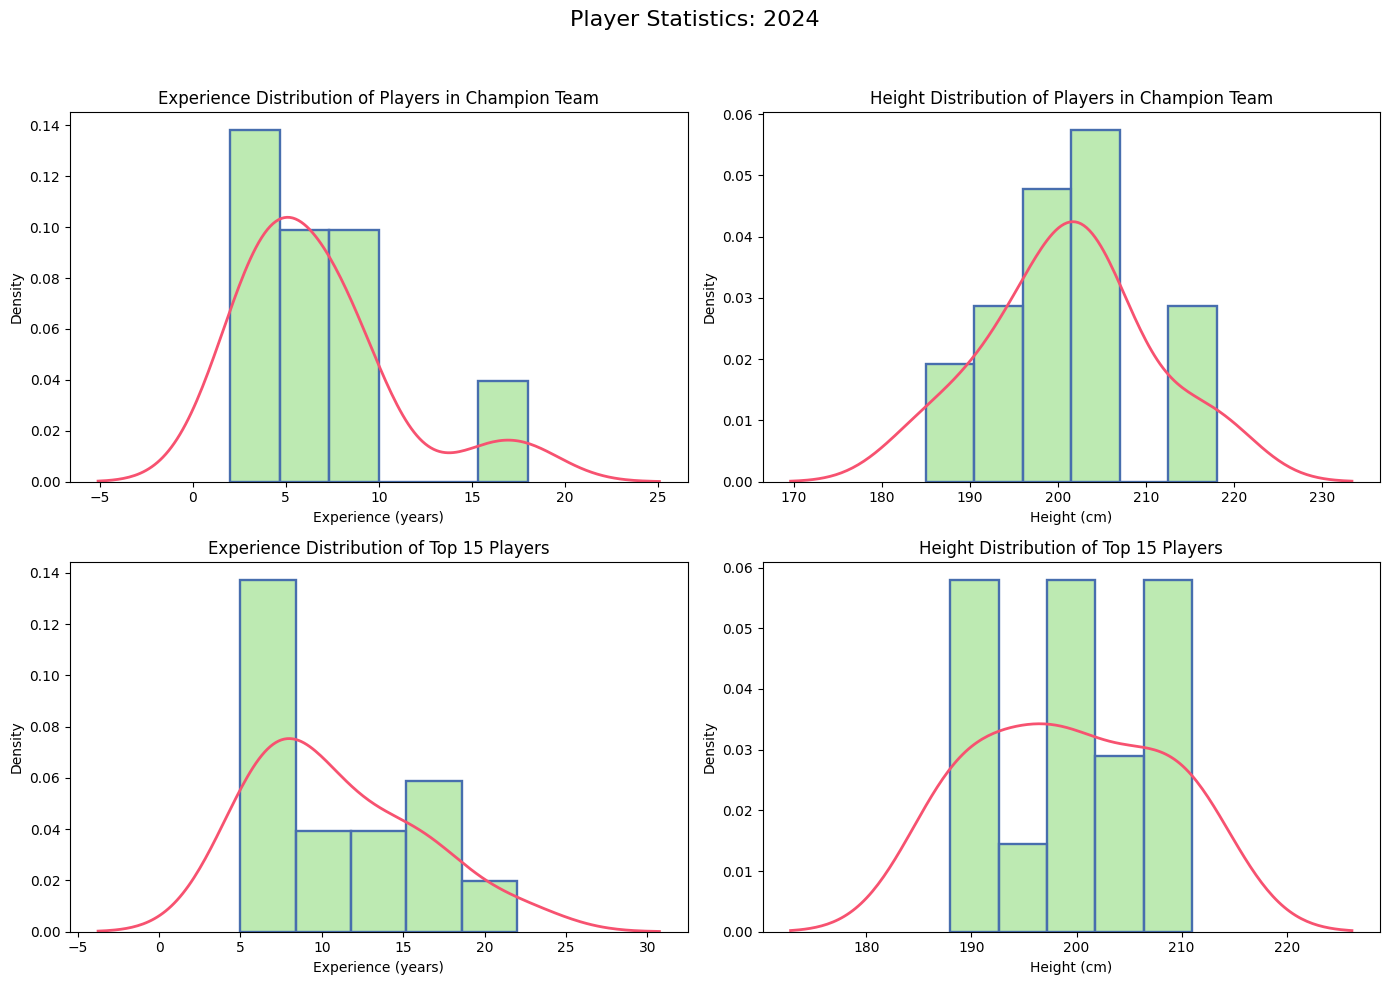

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Experience - Champion Team
sns.histplot(
    lc_players_2024['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,0]
)
sns.kdeplot(
    lc_players_2024['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[0,0]
)
axes[0,0].set_title('Experience Distribution of Players in Champion Team')
axes[0,0].set_xlabel('Experience (years)')
axes[0,0].set_ylabel('Density')

# Height - Champion Team
sns.histplot(
    lc_players_2024['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,1]
)
sns.kdeplot(
    lc_players_2024['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[0,1]
)
axes[0,1].set_title('Height Distribution of Players in Champion Team')
axes[0,1].set_xlabel('Height (cm)')
axes[0,1].set_ylabel('Density')

# Experience - Top 15 Players
sns.histplot(
    ts_players_top_15_2024['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,0]
)
sns.kdeplot(
    ts_players_top_15_2024['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[1,0]
)
axes[1,0].set_title('Experience Distribution of Top 15 Players')
axes[1,0].set_xlabel('Experience (years)')
axes[1,0].set_ylabel('Density')

# Height - Top 15 Players
sns.histplot(
    ts_players_top_15_2024['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,1]
)
sns.kdeplot(
    ts_players_top_15_2024['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[1,1]
)
axes[1,1].set_title('Height Distribution of Top 15 Players')
axes[1,1].set_xlabel('Height (cm)')
axes[1,1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2024', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [128]:
eh_lc_players_24 = lc_players_2024[['experience_years', 'height_cm']].describe()
eh_lc_players_24

,experience_years,height_cm
count,19.000000,19.000000
mean,6.684211,201.263158
std,4.256402,9.218593
min,2.000000,185.000000
25%,4.000000,195.500000
50%,5.000000,201.000000
75%,8.000000,206.000000
max,18.000000,218.000000


In [129]:
eh_ts_players_24 = ts_players_top_15_2024[['experience_years', 'height_cm']].describe()
eh_ts_players_24

,experience_years,height_cm
count,15.000000,15.000000
mean,10.866667,199.266667
std,5.012366,8.705226
min,5.000000,188.000000
25%,7.000000,191.500000
50%,10.000000,198.000000
75%,14.500000,207.000000
max,22.000000,211.000000


### 2025

In [56]:
lc_players_2025 = lc_players[lc_players['season'] == 2025]
lc_players_2025

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2
1,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2
2,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2
3,3Isa,Isaiah Hartenstein,213,115,26,7,NaN,2025,LC,25,2
4,4Cas,Cason Wallace,193,92,21,2,NaN,2025,LC,25,2
5,5Che,Chet Holmgren,216,96,22,2,NaN,2025,LC,25,2
6,6Aar,Aaron Wiggins,198,90,26,4,NaN,2025,LC,25,2
7,7Isa,Isaiah Joe,196,82,25,5,NaN,2025,LC,25,2
8,8Ale,Alex Caruso,196,84,30,8,NaN,2025,LC,25,2
9,9Jay,Jaylin Williams,203,113,22,3,NaN,2025,LC,25,2


In [57]:
ts_players_top_15_2025 = ts_players_top_15[ts_players_top_15['season'] == 2025]
ts_players_top_15_2025

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3
205,205Dev,Devin Booker,198,93,28,10,6.0,2025,TS,25,3
206,206Tra,Trae Young,185,74,26,7,7.0,2025,TS,25,3
207,207Tyl,Tyler Herro,196,88,25,6,8.0,2025,TS,25,3
208,208Cad,Cade Cunningham,198,99,23,4,9.0,2025,TS,25,3
209,209Jam,James Harden,196,99,35,16,10.0,2025,TS,25,3


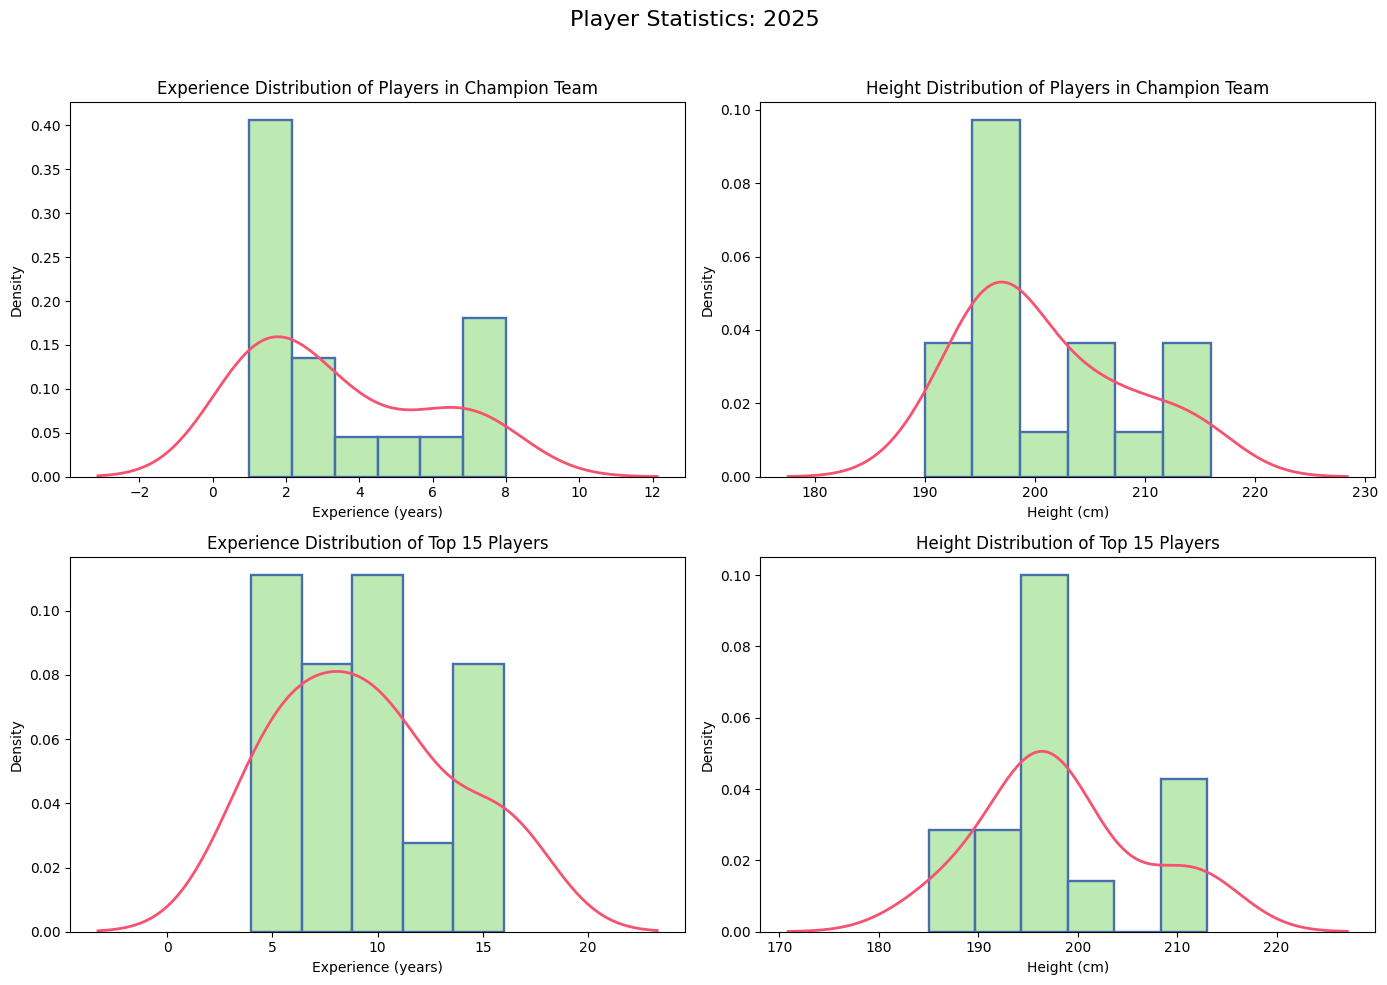

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Experience - Champion Team
sns.histplot(
    lc_players_2025['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,0]
)
sns.kdeplot(
    lc_players_2025['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[0,0]
)
axes[0,0].set_title('Experience Distribution of Players in Champion Team')
axes[0,0].set_xlabel('Experience (years)')
axes[0,0].set_ylabel('Density')

# Height - Champion Team
sns.histplot(
    lc_players_2025['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0,1]
)
sns.kdeplot(
    lc_players_2025['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[0,1]
)
axes[0,1].set_title('Height Distribution of Players in Champion Team')
axes[0,1].set_xlabel('Height (cm)')
axes[0,1].set_ylabel('Density')

# Experience - Top 15 Players
sns.histplot(
    ts_players_top_15_2025['experience_years'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,0]
)
sns.kdeplot(
    ts_players_top_15_2025['experience_years'],
    color='#F75270',
    lw=2,
    ax=axes[1,0]
)
axes[1,0].set_title('Experience Distribution of Top 15 Players')
axes[1,0].set_xlabel('Experience (years)')
axes[1,0].set_ylabel('Density')

# Height - Top 15 Players
sns.histplot(
    ts_players_top_15_2025['height_cm'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1,1]
)
sns.kdeplot(
    ts_players_top_15_2025['height_cm'],
    color='#F75270',
    lw=2,
    ax=axes[1,1]
)
axes[1,1].set_title('Height Distribution of Top 15 Players')
axes[1,1].set_xlabel('Height (cm)')
axes[1,1].set_ylabel('Density')

fig.suptitle('Player Statistics: 2025', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [130]:
eh_lc_players_25 = lc_players_2025[['experience_years', 'height_cm']].describe()
eh_lc_players_25

,experience_years,height_cm
count,19.000000,19.000000
mean,3.421053,200.947368
std,2.479153,7.457090
min,1.000000,190.000000
25%,1.000000,196.000000
50%,3.000000,198.000000
75%,5.500000,206.000000
max,8.000000,216.000000


In [131]:
eh_ts_players_25 = ts_players_top_15_2025[['experience_years', 'height_cm']].describe()
eh_ts_players_25

,experience_years,height_cm
count,15.000000,15.000000
mean,9.466667,198.466667
std,4.172472,8.087615
min,4.000000,185.000000
25%,6.500000,194.500000
50%,10.000000,198.000000
75%,11.500000,200.500000
max,16.000000,213.000000


## Identifying Suitable Players

In [68]:
merged_player_season_group_position = pd.merge(merged_player_season_group, position_data, on='ID')
merged_player_season_group_position

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,positions,ID_positions
0,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2,Point Guard,2
1,0Sha,Shai Gilgeous-Alexander,198,90,26,7,NaN,2025,LC,25,2,Shooting Guard,4
2,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2,Shooting Guard,4
3,1Jal,Jalen Williams,198,99,23,3,NaN,2025,LC,25,2,Power Forward,3
4,2Lug,Luguentz Dort,193,99,25,6,NaN,2025,LC,25,2,Small Forward,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3,Shooting Guard,4
639,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3,Small Forward,5
640,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3,Power Forward,3
641,349Spe,Spencer Dinwiddie,196,97,26,11,25.0,2020,TS,20,3,Point Guard,2


In [70]:
position_point_gaurd = merged_player_season_group_position[merged_player_season_group_position['positions'] == 'Point Guard']
position_point_gaurd_mjt = position_point_gaurd[position_point_gaurd['groupName'] == 'MJT']
position_point_gaurd_mjt

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,positions,ID_positions
189,115Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,MJT,25,1,Point Guard,2
194,117Gia,Giannis Antetokounmpo,211,109,30,12,3.0,2025,MJT,25,1,Point Guard,2
199,119Don,Donovan Mitchell,190,97,28,8,5.0,2025,MJT,25,1,Point Guard,2
202,120LeB,LeBron James,206,113,40,22,6.0,2025,MJT,25,1,Point Guard,2
205,121Cad,Cade Cunningham,198,99,23,4,7.0,2025,MJT,25,1,Point Guard,2
208,123Ste,Stephen Curry,188,83,36,16,9.0,2025,MJT,25,1,Point Guard,2
209,124Jal,Jalen Brunson,188,86,28,7,10.0,2025,MJT,25,1,Point Guard,2
211,125Jam,James Harden,196,99,35,16,10.0,2025,MJT,25,1,Point Guard,2
215,128Sha,Shai Gilgeous-Alexander,198,90,25,7,2.0,2024,MJT,24,1,Point Guard,2
217,129Luk,Luka Dončić,198,104,24,7,3.0,2024,MJT,24,1,Point Guard,2


In [71]:
best_player = position_point_gaurd_mjt.groupby('player_name').size().reset_index(name='count')
best_player_sorted = best_player.sort_values(by='count', ascending=False)
best_player_sorted.head(3)

,player_name,count
8,Giannis Antetokounmpo,7
13,Luka Dončić,5
16,Stephen Curry,5


# Hypothesis

## First Hypothesis

In [84]:
ts_players_top_20 = ts_players[ts_players['rank'] <= 20].copy()
ts_players_top_20['agility'] = ts_players_top_20['height_cm'] / ts_players_top_20['weight_kg']
ts_players_top_20

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,agility
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3,2.200000
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3,1.892157
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3,1.648438
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3,1.935780
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3,2.136842
...,...,...,...,...,...,...,...,...,...,...,...,...
340,340DeM,DeMar DeRozan,198,99,30,16,16.0,2020,TS,20,3,2.000000
341,341Bra,Brandon Ingram,203,86,22,9,17.0,2020,TS,20,3,2.360465
342,342Nik,Nikola Jokić,211,128,24,10,18.0,2020,TS,20,3,1.648438
343,343Tob,Tobias Harris,203,102,27,14,19.0,2020,TS,20,3,1.990196


In [106]:
ts_players_past_seasons_agility = ts_players_top_20[(ts_players_top_20['season'] >= 2021) & (ts_players_top_20['season'] <= 2022)]
past_agility_mean = ts_players_past_seasons_agility['agility'].mean()
print(f'Average Agility (Past Seasons): {past_agility_mean:.3f}')

Average Agility (Past Seasons): 2.038


In [107]:
ts_players_recent_seasons_agility = ts_players_top_20[(ts_players_top_20['season'] >= 2023) & (ts_players_top_20['season'] <= 2024)]
recent_agility_mean = ts_players_recent_seasons_agility['agility'].mean()
print(f'Average Agility (Recent Seasons): {recent_agility_mean:.3f}')

Average Agility (Recent Seasons): 2.039


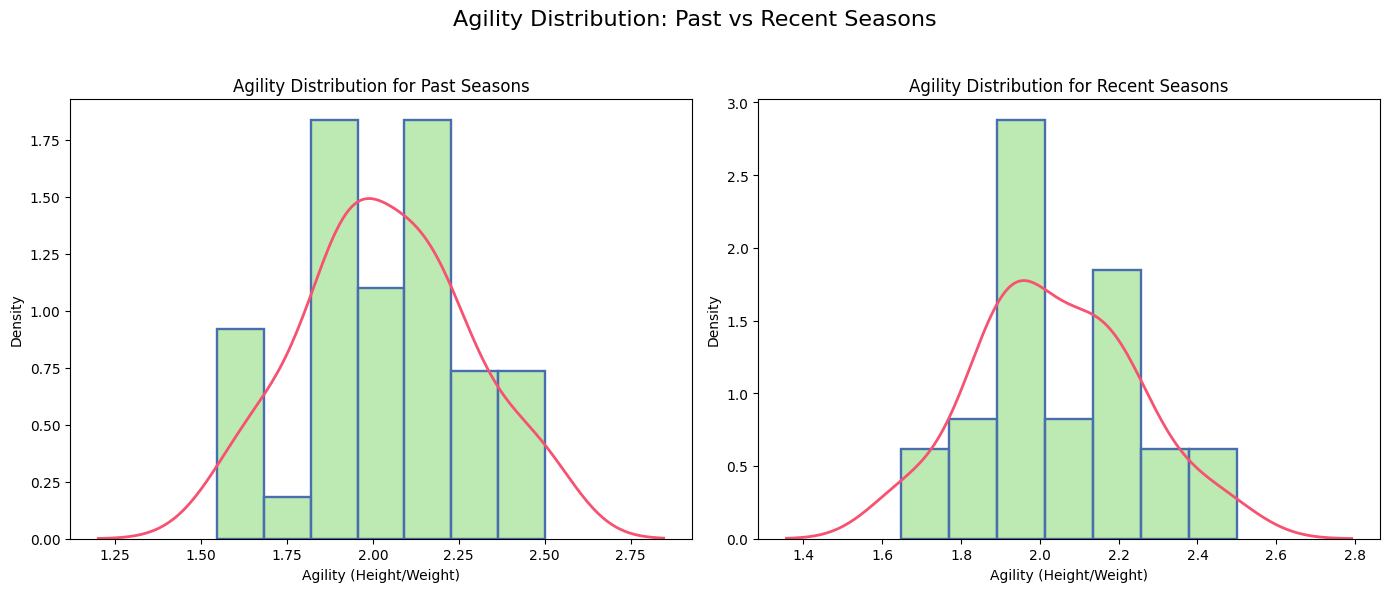

In [108]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    ts_players_past_seasons_agility['agility'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0]
)
sns.kdeplot(
    ts_players_past_seasons_agility['agility'],
    color='#F75270',
    lw=2,
    ax=axes[0]
)
axes[0].set_title('Agility Distribution for Past Seasons')
axes[0].set_xlabel('Agility (Height/Weight)')
axes[0].set_ylabel('Density')

sns.histplot(
    ts_players_recent_seasons_agility['agility'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1]
)
sns.kdeplot(
    ts_players_recent_seasons_agility['agility'],
    color='#F75270',
    lw=2,
    ax=axes[1]
)
axes[1].set_title('Agility Distribution for Recent Seasons')
axes[1].set_xlabel('Agility (Height/Weight)')
axes[1].set_ylabel('Density')

fig.suptitle('Agility Distribution: Past vs Recent Seasons', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [133]:
agility_past_seasons = ts_players_past_seasons_agility['agility'].describe()
agility_past_seasons

count    40.000000
mean      2.037784
std       0.241244
min       1.546875
25%       1.903331
50%       1.985294
75%       2.177778
max       2.500000
Name: agility, dtype: float64

In [134]:
agility_recent_seasons = ts_players_recent_seasons_agility['agility'].describe()
agility_recent_seasons

count    40.000000
mean      2.039422
std       0.203159
min       1.648438
25%       1.903846
50%       2.000000
75%       2.179845
max       2.500000
Name: agility, dtype: float64

In [111]:
past_agility = ts_players_past_seasons_agility['agility']
recent_agility = ts_players_recent_seasons_agility['agility']

stat_past, p_value_past = shapiro(past_agility)
print(f'Past Seasons: p-value = {p_value_past:.3f}')
if p_value_past > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

stat_recent, p_value_recent = shapiro(recent_agility)
print(f'Recent Seasons: p-value = {p_value_recent:.3f}')
if p_value_recent > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

Past Seasons: p-value = 0.437
✅ Data is normal.
Recent Seasons: p-value = 0.578
✅ Data is normal.


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← داده نرمال است.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← داده نرمال نیست. 
</p>

In [112]:
past_agility = ts_players_past_seasons_agility['agility']
recent_agility = ts_players_recent_seasons_agility['agility']

t_stat, p_value = ttest_ind(recent_agility, past_agility, equal_var=False)

print(f'T-test statistic: {t_stat:.3f}, P-value: {p_value:.3f}')

if p_value > 0.05:
    print('✅ No significant difference → Fail to reject H₀')
else:
    print('❌ Significant difference → Reject H₀')

T-test statistic: 0.033, P-value: 0.974
✅ No significant difference → Fail to reject H₀


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← تفاوت معناداری وجود ندارد و فرض صفر (H₀) رد نمی‌شود.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← تفاوت معنادار است و فرض صفر (H₀) رد می‌شود.  
</p>

## Second Hypothesis

In [ ]:
ts_players['innate_ability'] = ts_players['experience_years'] / ts_players['age']
ts_players

,ID,player_name,height_cm,weight_kg,age,experience_years,rank,season,groupName,ID_seasons,ID_group,agility,innate_ability
200,200Sha,Shai Gilgeous-Alexander,198,90,26,7,1.0,2025,TS,25,3,2.200000,0.269231
201,201Ant,Anthony Edwards,193,102,23,5,2.0,2025,TS,25,3,1.892157,0.217391
202,202Nik,Nikola Jokić,211,128,29,10,3.0,2025,TS,25,3,1.648438,0.344828
203,203Gia,Giannis Antetokounmpo,211,109,30,12,4.0,2025,TS,25,3,1.935780,0.400000
204,204Jay,Jayson Tatum,203,95,26,8,5.0,2025,TS,25,3,2.136842,0.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,345Pas,Pascal Siakam,203,104,25,9,21.0,2020,TS,20,3,1.951923,0.360000
346,346Col,Collin Sexton,190,86,21,7,22.0,2020,TS,20,3,2.209302,0.333333
347,347Sha,Shai Gilgeous-Alexander,198,90,21,7,23.0,2020,TS,20,3,2.200000,0.333333
348,348T.J,T.J. Warren,203,99,26,9,24.0,2020,TS,20,3,2.050505,0.346154


In [102]:
ts_players_past_seasons_ability = ts_players[(ts_players['season'] >= 2021) & (ts_players['season'] <= 2022)]
past_ability_mean = ts_players_past_seasons_ability['innate_ability'].mean()
print(f'Average Ability (Past Seasons): {past_ability_mean:.3f}')

Average Ability (Past Seasons): 0.389


In [103]:
ts_players_recent_seasons_ability = ts_players[(ts_players['season'] >= 2023) & (ts_players['season'] <= 2024)]
recent_ability_mean = ts_players_recent_seasons_ability['innate_ability'].mean()
print(f'Average Ability (Recent Seasons): {recent_ability_mean:.3f}')

Average Ability (Recent Seasons): 0.342


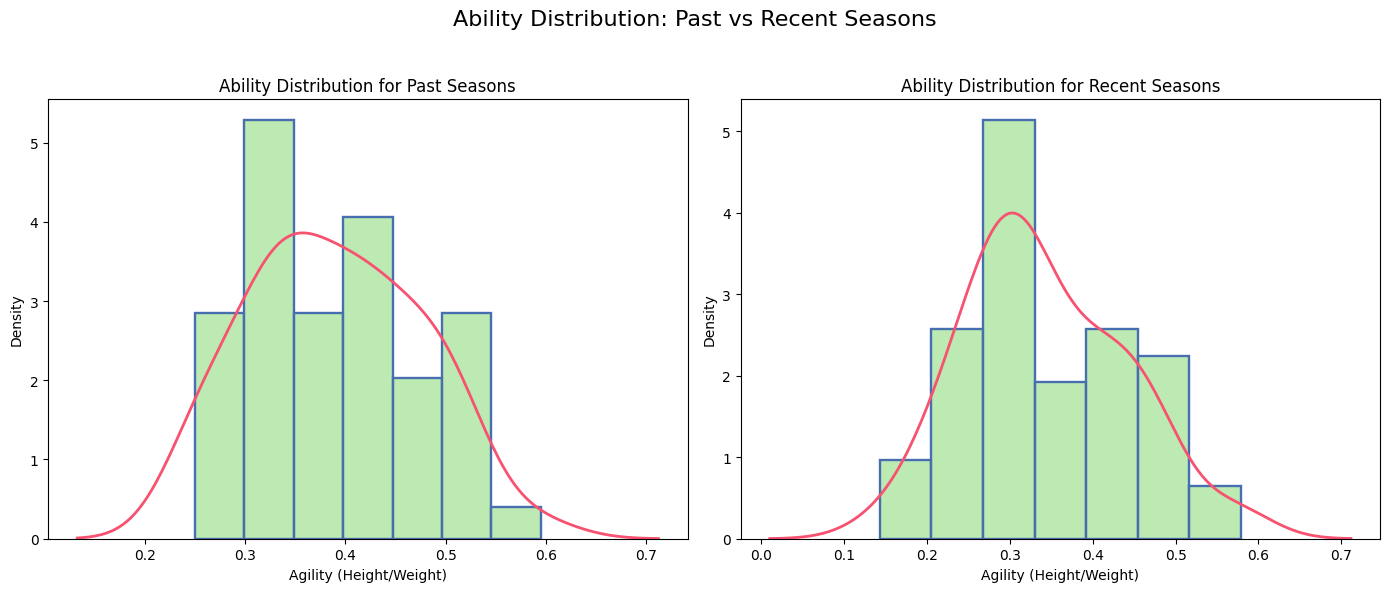

In [136]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(
    ts_players_past_seasons_ability['innate_ability'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[0]
)
sns.kdeplot(
    ts_players_past_seasons_ability['innate_ability'],
    color='#F75270',
    lw=2,
    ax=axes[0]
)
axes[0].set_title('Ability Distribution for Past Seasons')
axes[0].set_xlabel('Agility (Height/Weight)')
axes[0].set_ylabel('Density')

sns.histplot(
    ts_players_recent_seasons_ability['innate_ability'],
    color='#A7E399',
    edgecolor='#476EAE',
    linewidth=1.7,
    stat='density',
    ax=axes[1]
)
sns.kdeplot(
    ts_players_recent_seasons_ability['innate_ability'],
    color='#F75270',
    lw=2,
    ax=axes[1]
)
axes[1].set_title('Ability Distribution for Recent Seasons')
axes[1].set_xlabel('Agility (Height/Weight)')
axes[1].set_ylabel('Density')

fig.suptitle('Ability Distribution: Past vs Recent Seasons', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [137]:
ability_past_seasons = ts_players_past_seasons_ability['innate_ability'].describe()
ability_past_seasons

count    50.000000
mean      0.389285
std       0.085526
min       0.250000
25%       0.323333
50%       0.384615
75%       0.447318
max       0.594595
Name: innate_ability, dtype: float64

In [138]:
agility_recent_seasons = ts_players_recent_seasons_ability['innate_ability'].describe()
agility_recent_seasons

count    50.000000
mean      0.342454
std       0.096650
min       0.142857
25%       0.271923
50%       0.320714
75%       0.407118
max       0.578947
Name: innate_ability, dtype: float64

In [121]:
past_ability = ts_players_past_seasons_ability['innate_ability']
recent_ability = ts_players_recent_seasons_ability['innate_ability']

stat_past, p_value_past = shapiro(past_agility)
print(f'Past Seasons: p-value = {p_value_past:.3f}')
if p_value_past > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

stat_recent, p_value_recent = shapiro(recent_agility)
print(f'Recent Seasons: p-value = {p_value_recent:.3f}')
if p_value_recent > 0.05:
    print('✅ Data is normal.')
else:
    print('❌ Data is NOT normal.')

Past Seasons: p-value = 0.383
✅ Data is normal.
Recent Seasons: p-value = 0.561
✅ Data is normal.


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← داده نرمال است.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← داده نرمال نیست. 
</p>

In [122]:
past_ability = ts_players_past_seasons_ability['innate_ability']
recent_ability = ts_players_recent_seasons_ability['innate_ability']

t_stat, p_value = ttest_ind(recent_agility, past_agility, equal_var=False)

print(f'T-test statistic: {t_stat:.3f}, P-value: {p_value:.3f}')

if p_value > 0.05:
    print('✅ No significant difference → Fail to reject H₀')
else:
    print('❌ Significant difference → Reject H₀')

T-test statistic: 0.054, P-value: 0.957
✅ No significant difference → Fail to reject H₀


<p style='font-family: Vazir; font-size:20px; direction:rtl; text-align:right;'>
✅ اگر مقدار <b>p-value > 0.05</b> باشد ← تفاوت معناداری وجود ندارد و فرض صفر (H₀) رد نمی‌شود.  
<br><br>
❌ اگر مقدار <b>p-value < 0.05</b> باشد ← تفاوت معنادار است و فرض صفر (H₀) رد می‌شود.  
</p>

## Third Hypothesis

<p dir="rtl">
در بازیکنان برتر، پوزیشن point guard از بازیکنان سنگین تری تشکیل شده بود.
</p>


## Fourth hypothesis

<p dir="rtl">
در بازیکنان برتر، پوزیشن center از بازیکنان مجرب تری تشکیل شده بود.
</p>